<h1>CO2 EMISSIONS Prediction Using Linear Regression</h1>

### Importing Needed packages

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from url.

In [7]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-07 17:28:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  102K 0s
    50K .......... ..........                                 100% 1.36M=0.5s

2020-06-07 17:28:14 (140 KB/s) - 'FuelConsumption.csv' saved [72629/72629]




<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading data

In [8]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploring the data

In [9]:
#getting statistical details about the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
#to see the correlation between parameters of dataset
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### Visualizing the relationship between every independent variable with dependent variable

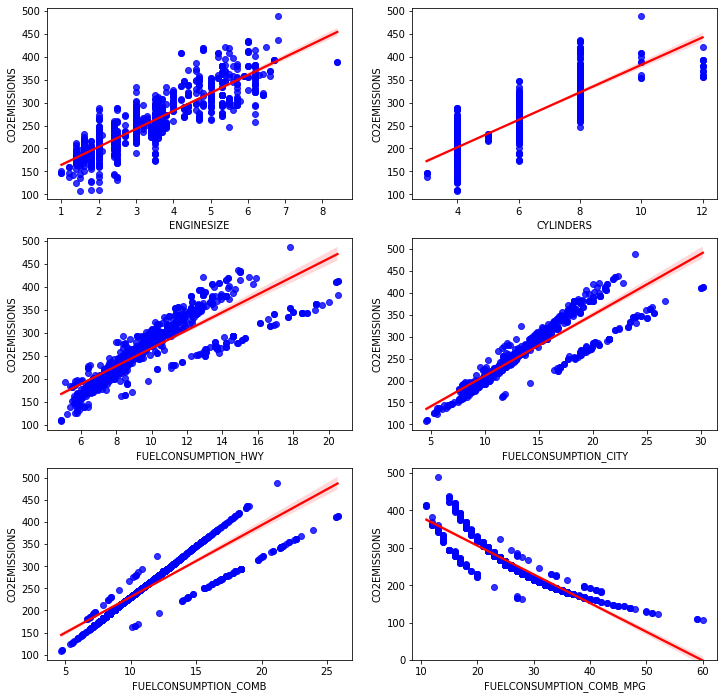

In [11]:
import seaborn as sns
fig, axarr = plt.subplots(3, 2, figsize=(12, 12))
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df,scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[0][0])
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[0][1])
sns.regplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[1][0])
sns.regplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[1][1])
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[2][0])
sns.regplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax=axarr[2][1])
plt.ylim(0,)
plt.show()

In [12]:
#selecting only numeric values for prediction
X=np.asarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
Y=np.asarray(df['CO2EMISSIONS'])

In [13]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Multiple Linear Regression

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [  9.27068028   7.06674514 -13.13937489  -5.51781561  21.91742432
  -3.96566636]
Intercept:  261.83483912779167


In [15]:
Y_hat = regr.predict(X_test)
print("Y_hat",Y_hat[:5])
print("Y_test",Y_test[:5])

Y_hat [309.94166042 252.07159226 311.78595251 249.75584331 173.41709472]
Y_test [292 288 301 286 170]


In [16]:
#evaluating the model
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"% np.mean((Y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_hat, Y_test))

Residual sum of squares: 427.89
R2-score: 0.89
